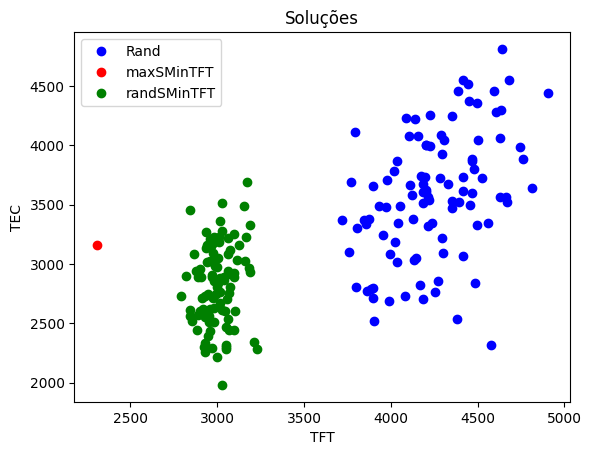

In [23]:
import csv
import matplotlib.pyplot as plt

def get_points_from_file(path):
    x_array= []
    y_array = []
    with open(path, newline='') as csv_file:
        reader = csv.reader(csv_file, delimiter=',', quotechar = '\'')
        next(reader, None)
        for row in reader:
            #print(row)
            x_array.append(float(row[1]))
            y_array.append(float(row[2]))

    return x_array, y_array



x_array_tft_rand, y_array_tec_rand = get_points_from_file('pop_output.csv')
x_array_tft_max_s_min_tft, y_array_tec_max_s_min_tft = get_points_from_file('max_s_min_tft.csv')
x_array_tft_rand_s_min_tft, y_array_tec_rand_s_min_tft = get_points_from_file('rand_s_min_tft.csv')

fig,ax=plt.subplots(1,1)
ax.plot(x_array_tft_rand, y_array_tec_rand, 'bo',markersize=6, label="Rand")
ax.plot(x_array_tft_max_s_min_tft, y_array_tec_max_s_min_tft, 'ro',markersize=6, label="maxSMinTFT")
ax.plot(x_array_tft_rand_s_min_tft, y_array_tec_rand_s_min_tft, 'go',markersize=6, label="randSMinTFT")
ax.legend()
ax.set_title('Soluções')
ax.set_xlabel('TFT')
ax.set_ylabel('TEC')
plt.show()
